# Notebook for reproducing SI figure of numerical difference

In [2]:
import time
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colormaps
from tqdm.auto import tqdm

from mbhl import *

In [3]:
%mkdir -p subfigs-SI-error

In [11]:
def plot_pattern_square(
    ax,
    delta=50 * nm,
    phi=5,
    theta=30,
    R=300 * nm,
    n_pts=360,
    r=50 * nm,
    Lr_ratio=4,
    lim=(0, 1 * um, 0, 1 * um),
    method="fft",
):
    phi = np.deg2rad(phi)
    gap = R / np.tan(phi) - delta
    print(f"phi {np.degrees(phi)}, gap {gap}")
    if gap < 0:
        raise ValueError("Cannot simulate system with negative gap!")
    Rm = np.tan(phi) * delta
    rm_ratio = Rm / (2 * r)
    print("Rm ratio, ", rm_ratio)
    theta = np.deg2rad(theta)
    L = r * Lr_ratio
    # print(f"Shift is {R / um} um")
    geom = square_hole_lattice(r, L)
    stencil = Stencil(geom, thickness=delta, gap=gap, h=L / 128)
    phys = Physics(n_beam_trajectory(phi, theta_0=theta, n_pts=n_pts))
    system = System(stencil, phys)
    system.simulate(method=method, fold_to_bz=False)
    if ax is not None:
        ax.set_axis_off()
        ax, cm = system.draw(
            ax=ax,
            cmap="viridis",
            domain=lim,
            show_mask=True,
        )
    return system, ax, cm

2
phi 2.0, gap 5.677250656583121
Rm ratio,  0.017460384745873865
5
phi 5.0, gap 2.236010460552269
Rm ratio,  0.04374433176296199
10
phi 10.0, gap 1.0842563639235419
Rm ratio,  0.08816349035423249
30
phi 29.999999999999996, gap 0.2964101615137756
Rm ratio,  0.2886751345948128
45
phi 45.0, gap 0.15000000000000002
Rm ratio,  0.49999999999999994
60
phi 59.99999999999999, gap 0.06547005383792519
Rm ratio,  0.8660254037844384
2
phi 2.0, gap 5.677250656583121
Rm ratio,  0.017460384745873865
5
phi 5.0, gap 2.236010460552269
Rm ratio,  0.04374433176296199
10
phi 10.0, gap 1.0842563639235419
Rm ratio,  0.08816349035423249
30
phi 29.999999999999996, gap 0.2964101615137756
Rm ratio,  0.2886751345948128
45
phi 45.0, gap 0.15000000000000002
Rm ratio,  0.49999999999999994
60
phi 59.99999999999999, gap 0.06547005383792519
Rm ratio,  0.8660254037844384
2
phi 2.0, gap 5.677250656583121
Rm ratio,  0.017460384745873865
5
phi 5.0, gap 2.236010460552269
Rm ratio,  0.04374433176296199
10
phi 10.0, gap 1.0842

/var/folders/q6/nnm9lfkd06s5jzm7psvk588w0000gn/T/ipykernel_74763/1587593142.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(6, 6))


30
phi 29.999999999999996, gap 0.2964101615137756
Rm ratio,  0.2886751345948128
45
phi 45.0, gap 0.15000000000000002
Rm ratio,  0.49999999999999994
60
phi 59.99999999999999, gap 0.06547005383792519
Rm ratio,  0.8660254037844384
2
phi 2.0, gap 5.677250656583121
Rm ratio,  0.017460384745873865
5
phi 5.0, gap 2.236010460552269
Rm ratio,  0.04374433176296199
10
phi 10.0, gap 1.0842563639235419
Rm ratio,  0.08816349035423249
30
phi 29.999999999999996, gap 0.2964101615137756
Rm ratio,  0.2886751345948128
45
phi 45.0, gap 0.15000000000000002
Rm ratio,  0.49999999999999994
60
phi 59.99999999999999, gap 0.06547005383792519
Rm ratio,  0.8660254037844384


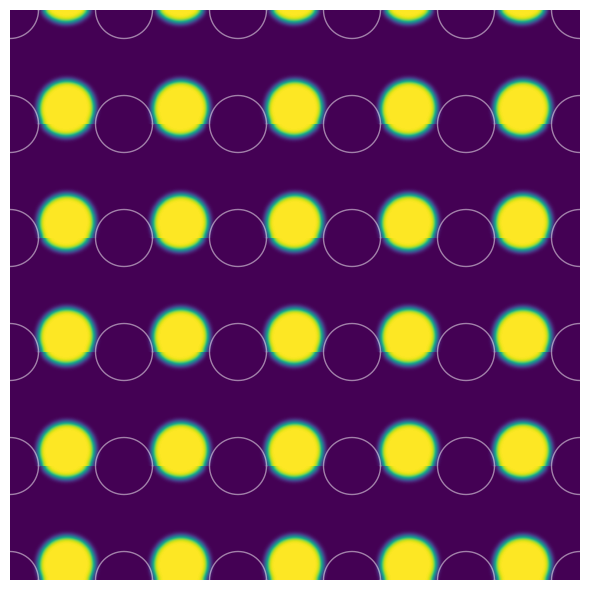

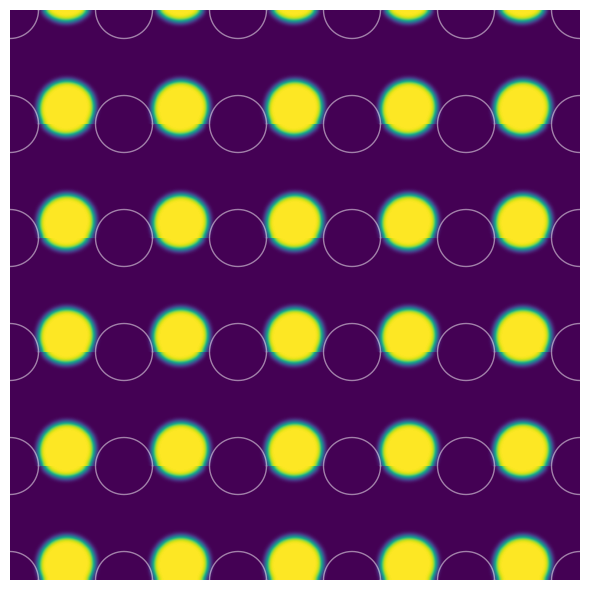

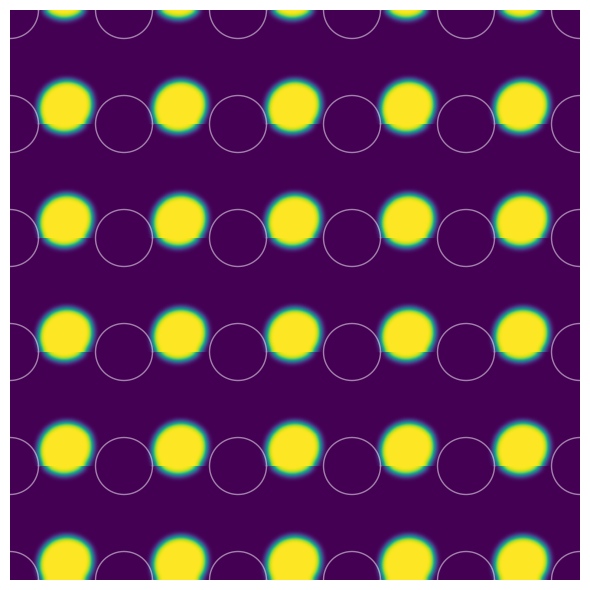

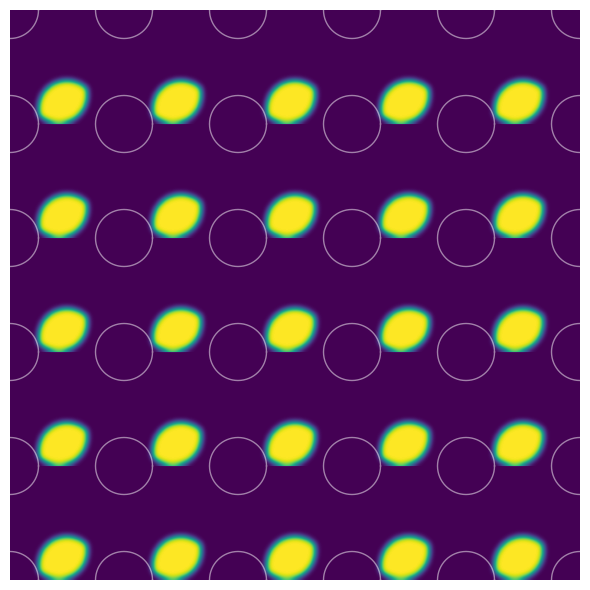

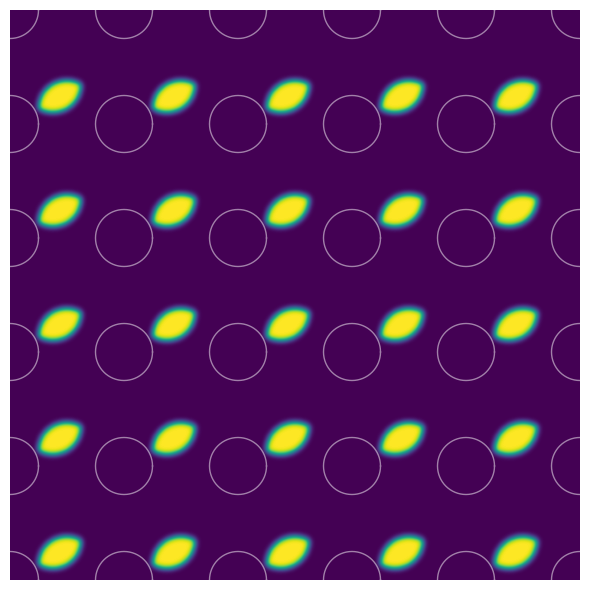

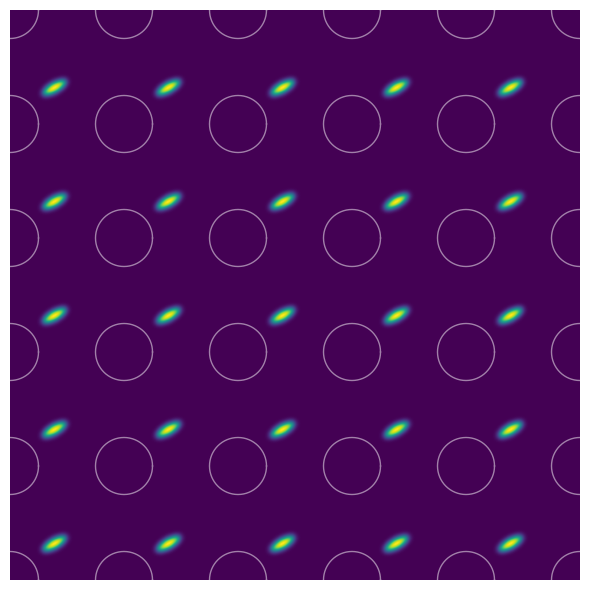

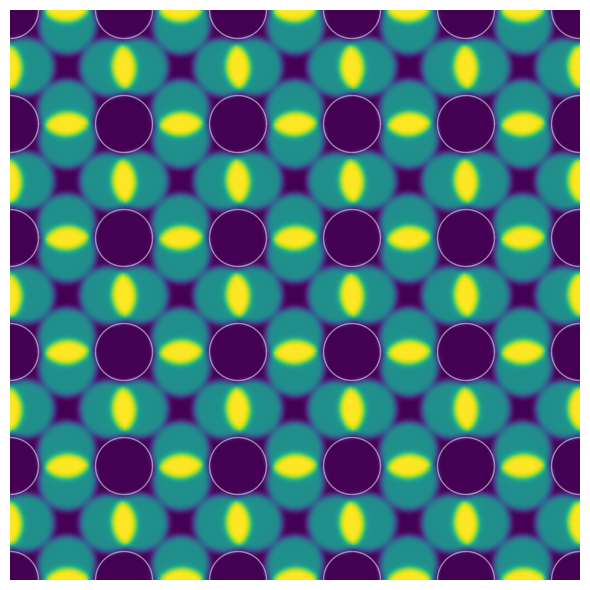

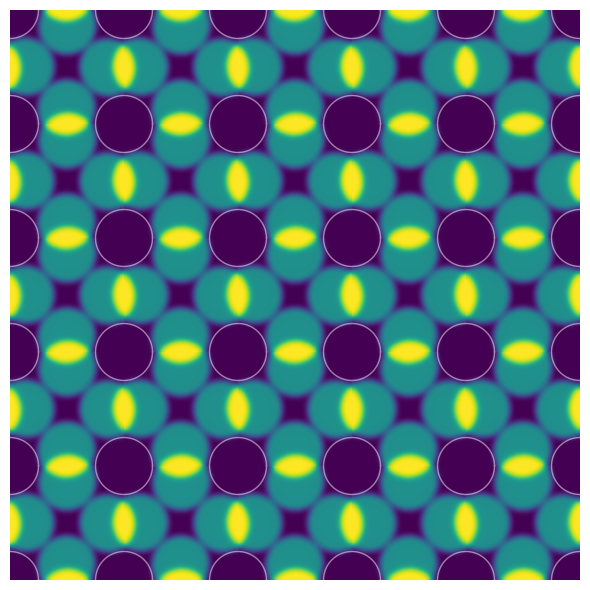

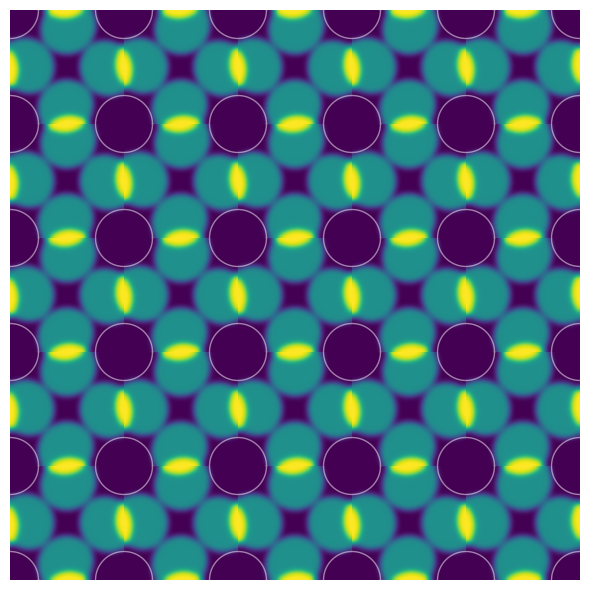

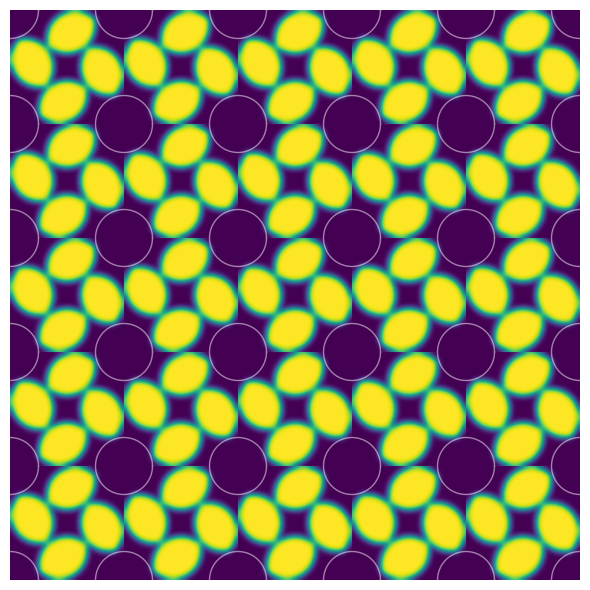

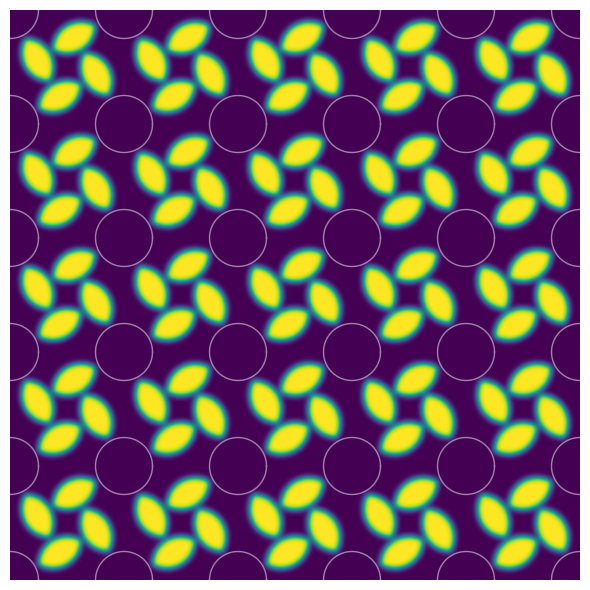

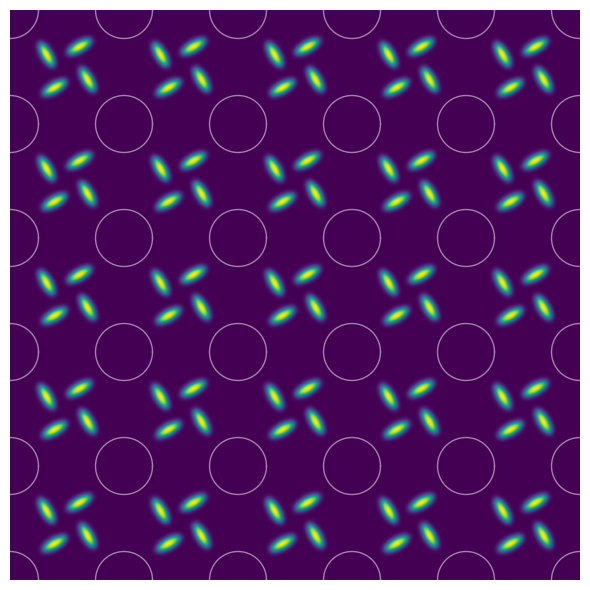

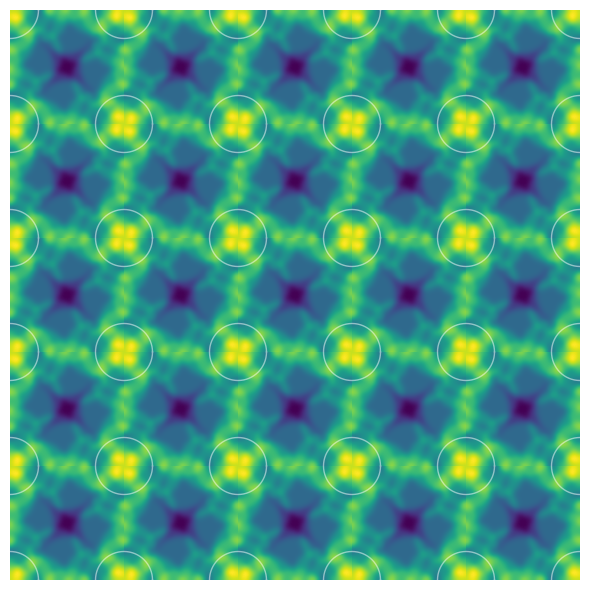

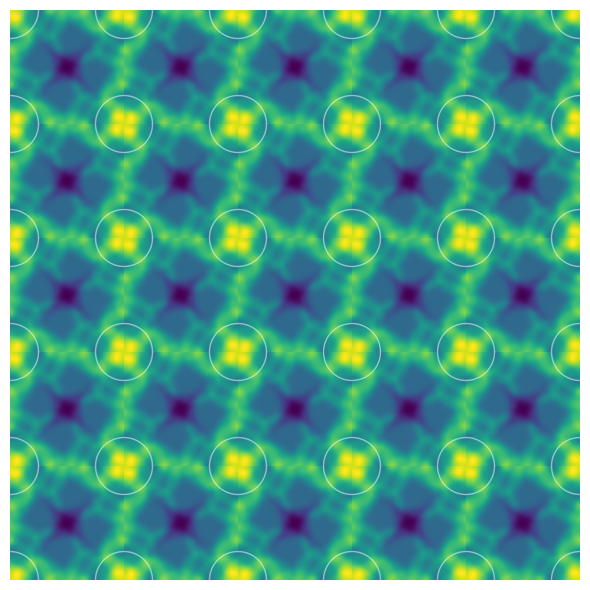

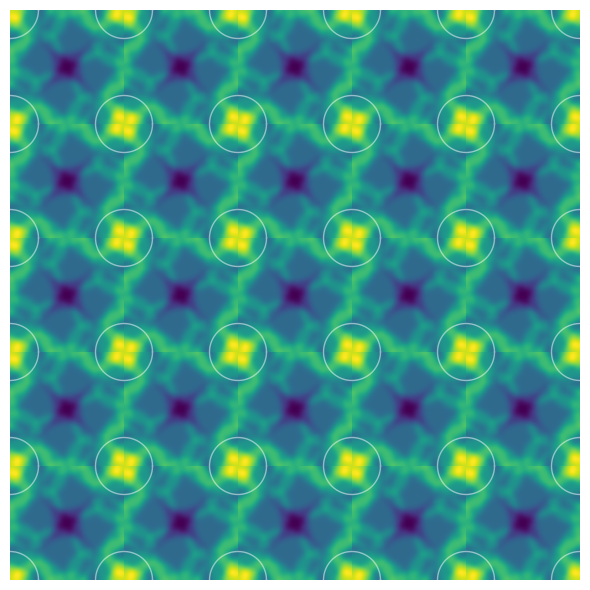

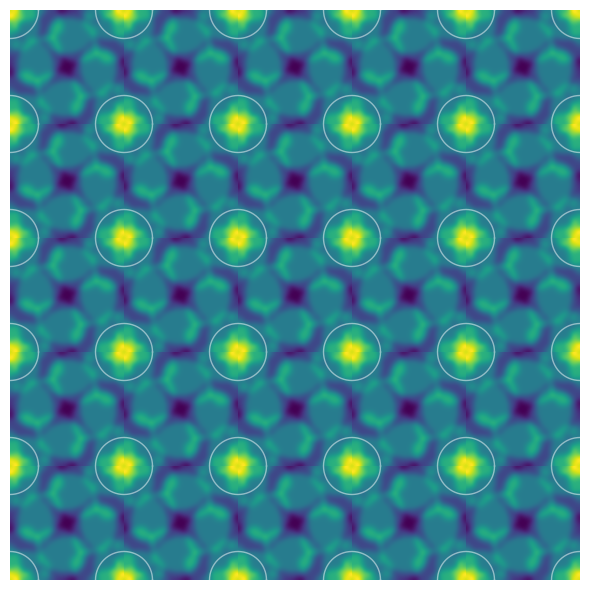

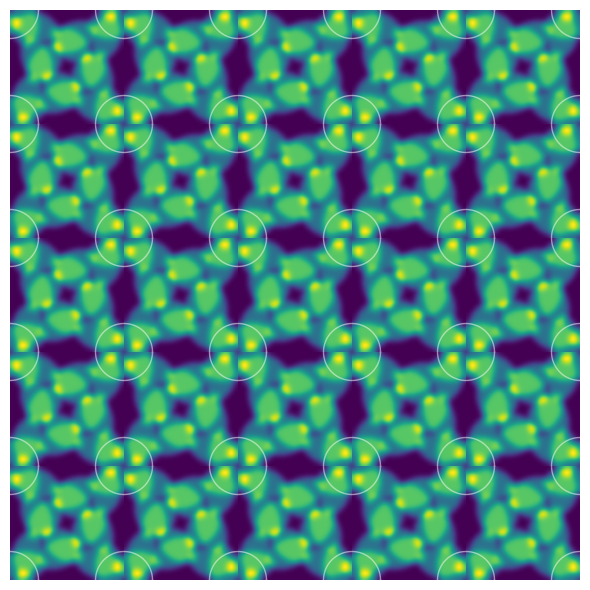

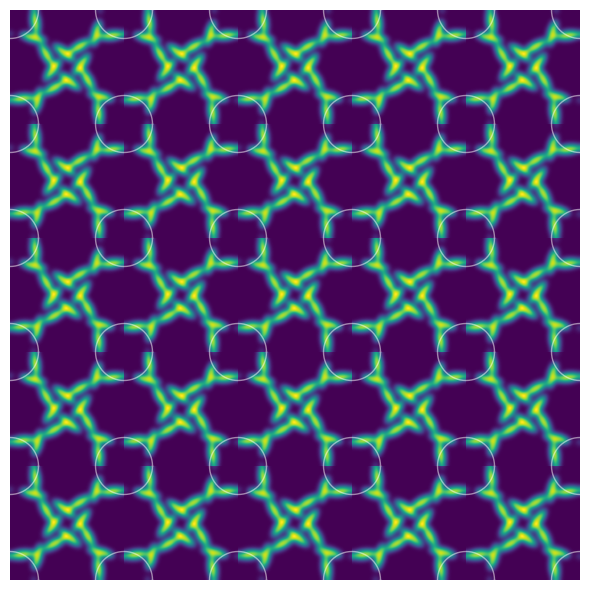

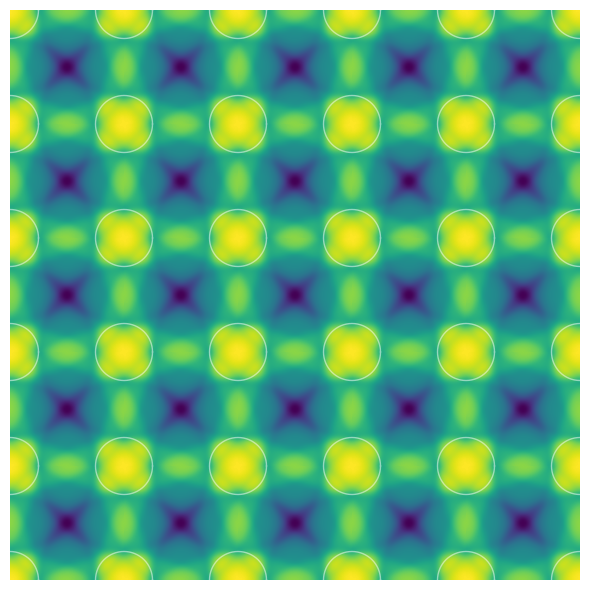

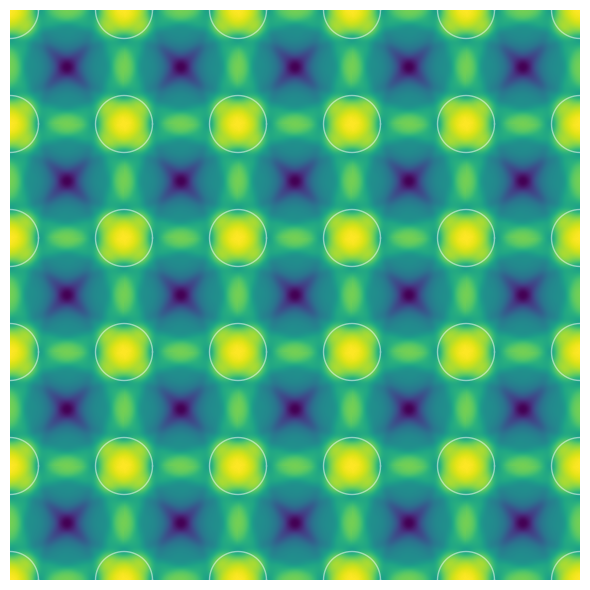

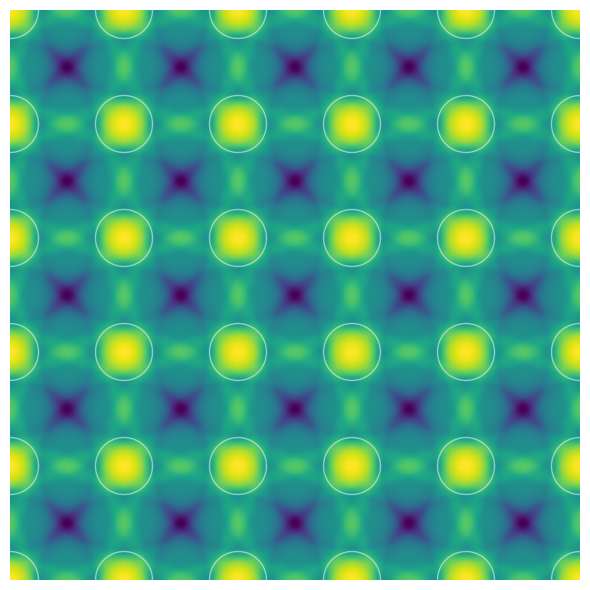

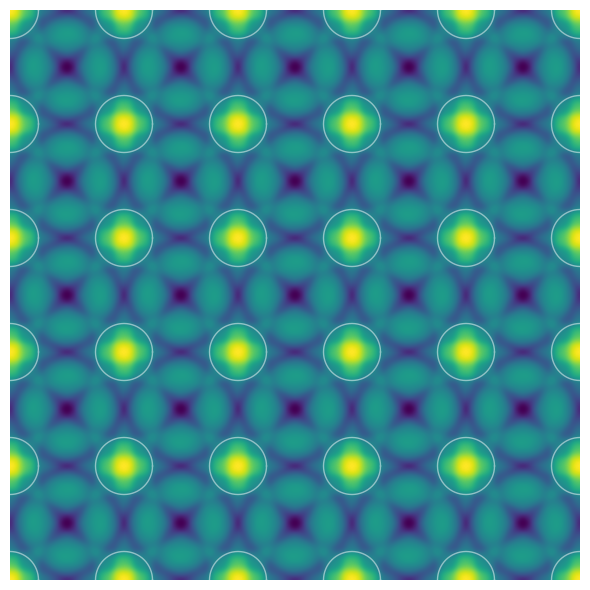

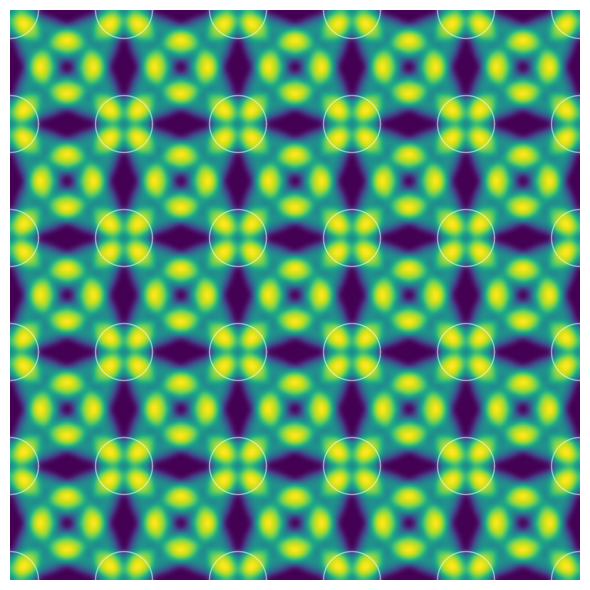

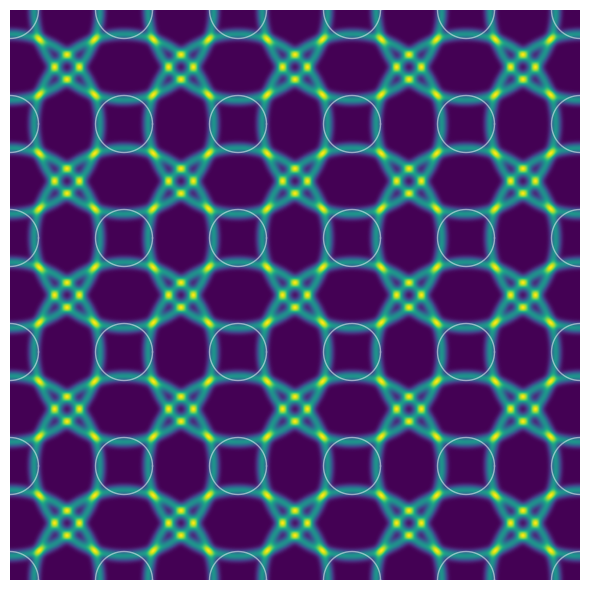

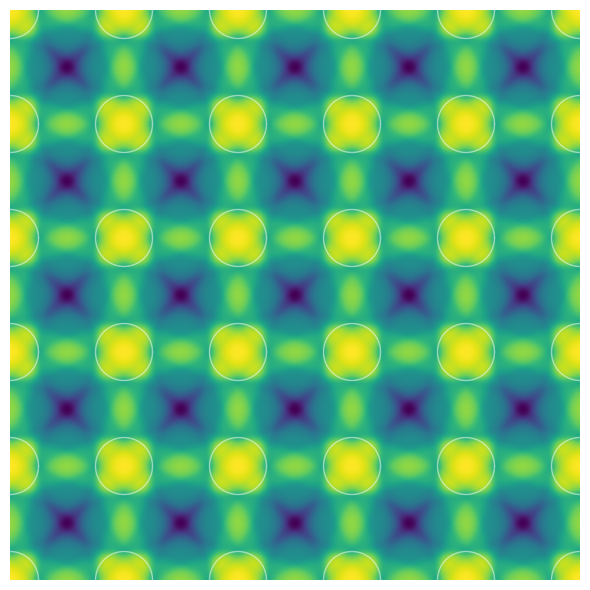

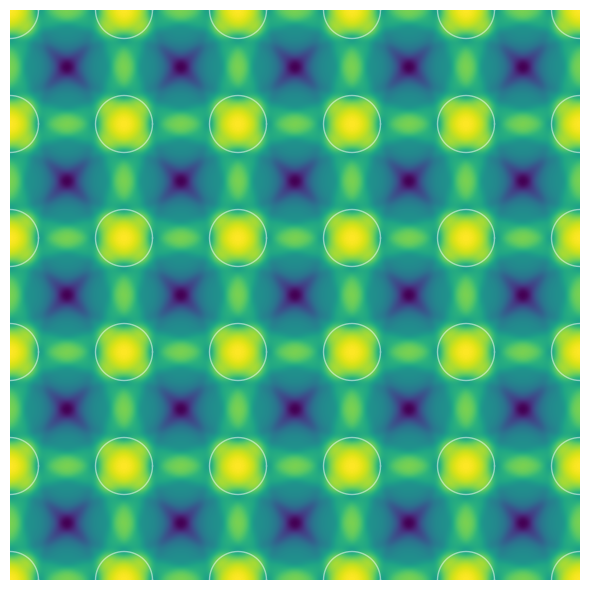

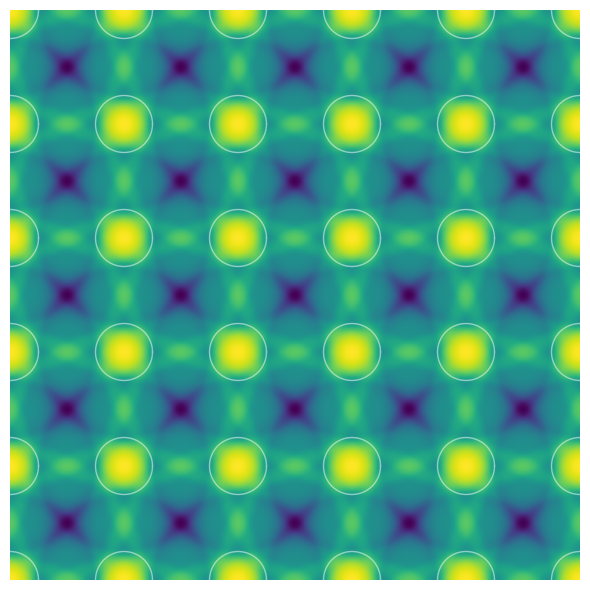

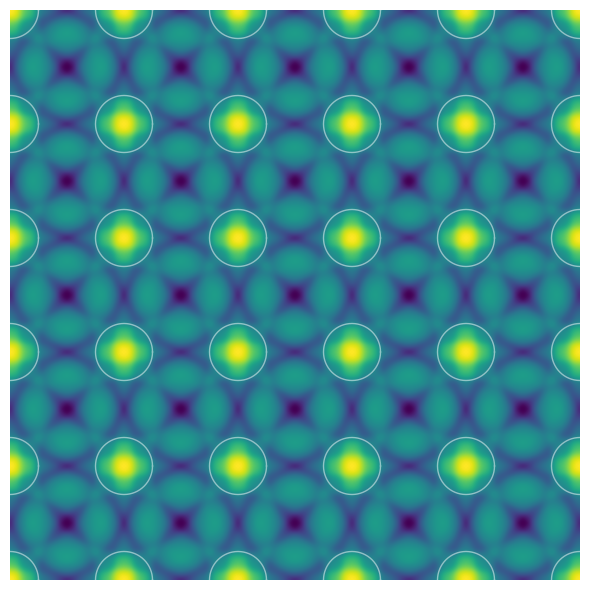

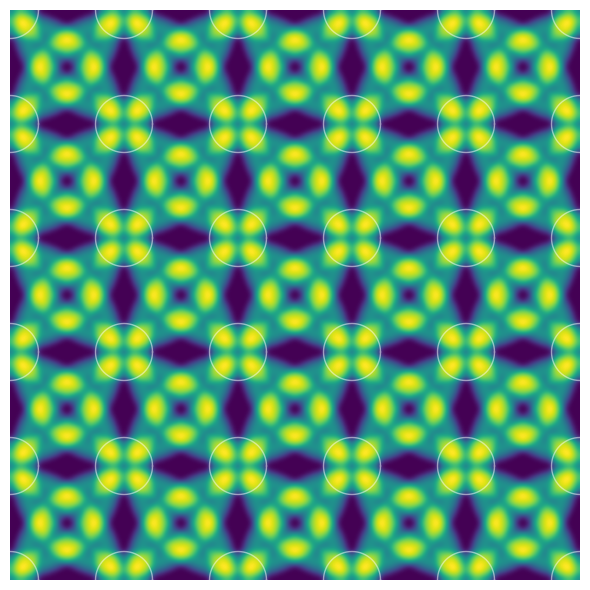

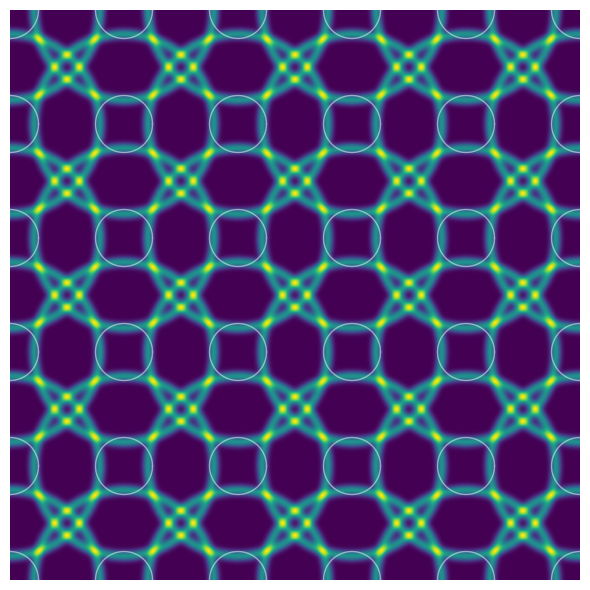

In [12]:
for n_pts in (1, 4, 16, 128, 1000):
    for phi in (2, 5, 10, 30, 45, 60):
        fig, ax = plt.subplots(figsize=(6, 6))
        phi = phi
        print(phi)
        domain = (0, 1 * um, 0, 1 * um)
        system, *_ = plot_pattern_square(
            ax,
            phi=phi,
            delta=50 * nm,
            r=50 * nm,
            R=200 * nm,
            method="raytracing",
            lim=domain,
            n_pts=n_pts,
        )
        fig.tight_layout()
        fig.savefig(
            Path("subfigs-SI-error") / f"MBHL-phi-{phi}-npts-{n_pts}.svg"
        )

Rm ratio,  0.04374433176296199


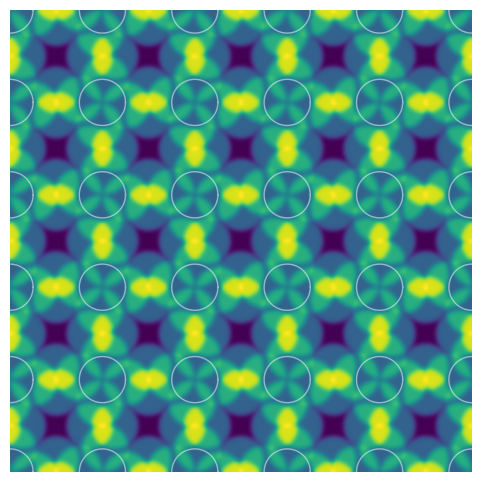

In [6]:
fig, ax = plt.subplots(figsize=(6, 6))
phi = 5
domain = (0, 1 * um, 0, 1 * um)
system, *_ = plot_pattern_square(
    ax,
    phi=phi,
    delta=50 * nm,
    r=50 * nm,
    R=200 * nm,
    method="fft",
    lim=domain,
    n_pts=8,
)

Shift is 0.11917535925942098 um


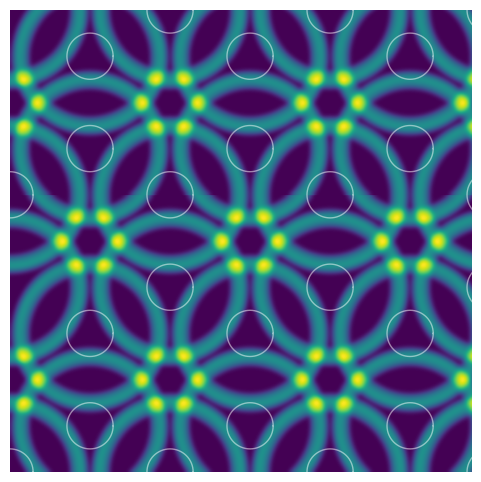

In [111]:
fig, ax = plt.subplots(figsize=(6, 6))
phi = 50
domain = (0, 1 * um, 0, 1 * um)
system2, *_ = plot_pattern_honeycomb(
    ax,
    phi=phi,
    delta=50 * nm,
    r=50 * nm,
    gap=100 * nm,
    method="raytracing",
    lim=domain,
    n_pts=360,
)

In [84]:
res1 = system.results.array / system.results.array.max()
res2 = system2.results.array / system2.results.array.max()
np.mean(np.abs(res1 - res2) / (res1 + 1.0e-8))

0.2343325555824076

In [90]:
(res1 - res2).max()

0.1758979067192073

In [69]:
system.results.array

array([[ 92.82950645,  94.8178903 ,  99.91508124, ...,  99.91508124,
         94.8178903 ,  92.82950645],
       [ 91.98234778,  94.99734763, 100.81750866, ..., 100.81750866,
         94.99734763,  91.98234778],
       [ 91.31661254,  95.3347884 , 101.80838185, ..., 101.80838185,
         95.3347884 ,  91.31661254],
       ...,
       [ 93.07656802,  95.39743468,  99.64268773, ...,  99.64268773,
         95.39743468,  93.07656802],
       [ 92.52773536,  94.24230582,  98.44272307, ...,  98.44272307,
         94.24230582,  92.52773536],
       [ 92.78717336,  94.32130024,  98.83615112, ...,  98.83615112,
         94.32130024,  92.78717336]])

In [7]:
200 / 11.156 * 0.702

12.585155969881676

In [9]:
200 / 11.156 * 2.096

37.57619218357834

In [10]:
200 / 11.156 * 3.595

64.44962352097527